## Business Objective

- To find out which variable affect the prices of house for US-based housing company named Surprise Housing so that they purchase houses at a price below their actual values and flip them on at a higher price.

## AIM
- Have to make model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
    - Which variables are significant in predicting the price of a house
    - How well those variables describe the price of a house.
    - Determine the optimal value of lambda for ridge and lasso regression

## Steps Involved in Building Model
1. Data understanding and exploration
2. Data cleaning
3. Data preparation
4. Model building and evaluation

### Step-1 :- Data Understanding and Exploration

In [1]:
# Importing Libraries
# For EDA
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# For ignoring warning
from warnings import filterwarnings
filterwarnings('ignore')

##### Checking encoding of dataset

In [2]:
# Importing library
import chardet

In [3]:
# Checking encoding
with open(r'train.csv','rb') as data:
    print(chardet.detect(data.read(2000)))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


##### Loading Dataset

In [4]:
# Loading dataset
house_sale = pd.read_csv(r'train.csv', encoding='palmos')
house_sale.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking Shape of dataset
house_sale.shape

(1460, 81)

In [6]:
# Checking Info of dataset
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Checking Satistic Description
house_sale.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step-2: Data Cleaning

##### Dealing with Null values

In [8]:
# Checking Null values in each column
pd.set_option('display.max_rows',None)
house_sale.isnull().sum(axis= 0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
# Checking percentage of null values
round((house_sale.isnull().sum(axis= 0)/len(house_sale.index))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [10]:
# Columns which is having null value greater than 0
null_col = {}
for i in house_sale.columns:
    if house_sale[i].isnull().sum() > 0:
        null_col[i] = [house_sale[i].isnull().sum(),round((house_sale[i].isnull().sum(axis= 0)/len(house_sale.index))*100,2)]

# null_col = {"Column_Name": ["Count of Null Value", "Percentage of Null value"]}
null_col

# Sorting by descending "Percentage of Null value"
null_col = sorted(null_col.items(),key=(lambda x: x[1]),reverse = True)

# Creataing dataframe
null_column = pd.DataFrame(null_col, columns=["Column", "Values"])
null_column["Count"] = null_column["Values"].apply(lambda x: x[0]) # Count
null_column["Percentage"] = null_column["Values"].apply(lambda x: x[1]) # Percentage
null_column = null_column.set_index("Column") # Setting index
null_column.drop(columns = "Values", inplace=True) # droppting values
null_column

,Count,Percentage
Column,,
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [11]:
# Copying dataset
df = house_sale.copy()

Column : `PoolQC`

In [12]:
# Value_count
df["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [13]:
# Checking randomness of null value
df[df["PoolQC"].isnull()][["PoolQC", "PoolArea"]]

,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
6,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0


##### From above we can conclude that the if "PoolArea" is 0 that means Pool is not present in house hence "PoolQC" will be None

In [14]:
# Hence filling null value with Na (No Pool)
df["PoolQC"].fillna("Na",inplace= True)

Column : `MiscFeature`

In [15]:
# Checking value counts
df["MiscFeature"].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [16]:
# Checking Randomness of null value
df[df["MiscFeature"].isnull()][["MiscFeature", "MiscVal"]]

,MiscFeature,MiscVal
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
6,NaN,0
8,NaN,0
9,NaN,0
10,NaN,0
11,NaN,0


#### From above we can conclude that the when the there is no Miscellaneous feature present in house than miscellaneous feature will be None

In [17]:
# Hence fill null value with Na (None)
df["MiscFeature"].fillna("Na", inplace=True)

Column : `Alley`

In [18]:
# Calculating value count
df["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [19]:
# Dropping this column as we don't have any comparision and having null value greater than 80%
df.drop(columns="Alley", inplace=True)

Column :`Fence`

In [20]:
# Calculating value_count
df["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [21]:
# Filling null value with "Na" (No Fence)
df["Fence"].fillna("Na", inplace= True)

Column: `"FireplaceQC"`

In [22]:
# Value_count
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [23]:
# Checking null value
df[df["FireplaceQu"].isnull()][["FireplaceQu", "Fireplaces"]]

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0
17,NaN,0
18,NaN,0
19,NaN,0
26,NaN,0
29,NaN,0


##### From above we conclude that the if there is no FirePlace the FireplaceQu is None

In [24]:
# Assiging null value with "Na" - "No Fireplace"
df["FireplaceQu"].fillna(value="Na", inplace=True)

Column: `"LotFrontage"`

In [25]:
# Checking column "LotFrontage"
df["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

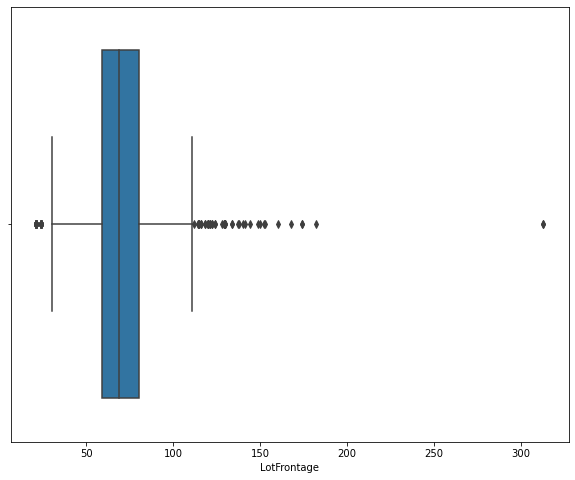

In [26]:
# Plotting box plot
plt.figure(figsize=(10,8))
sns.boxplot(df["LotFrontage"])
plt.show()

In [27]:
# filling null value with median
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)

Column : `GarageType`

In [28]:
# Calculating value counts
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [29]:
# Checking Randomness of null value
df[df["GarageType"].isnull()][["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


#### From above we can conclude that the if house is not having any Garage than "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond" will be None

In [30]:
# In Garage Type we cannot fit value as "None" as missing percentage is less than 10
# Hence imputing null value with mode(maximum number of occurance)
mode = df["GarageType"].mode()
print(mode)
df["GarageType"].fillna(value="Attchd", inplace=True)

0    Attchd
dtype: object


Column : `GarageFinish`

In [31]:
# Value count
df["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [32]:
# Imputing null values with mode(maximum number of occurance)
mode = df["GarageFinish"].mode()
print(mode)
df["GarageFinish"].fillna(value="Unf", inplace=True)

0    Unf
dtype: object


Column : `GarageQual`

In [33]:
# Value_count
df["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [34]:
# Imputing null values with mode(maximum number of occurance)
mode = df["GarageQual"].mode()
print(mode)
df["GarageQual"].fillna(value = "TA", inplace=True)

0    TA
dtype: object


Column : `GarageCond`

In [35]:
# Value count
df["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [36]:
# Imputing null values with mode(maximum number of occurance)
mode = df["GarageCond"].mode()
print(mode)
df["GarageCond"].fillna(value = "TA", inplace=True)

0    TA
dtype: object


Column : `GarageYrBlt`

In [37]:
# Value_count
df["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [38]:
# Assiging median to the null value
df["GarageYrBlt"].fillna(value=df["GarageYrBlt"].median(), inplace=True)

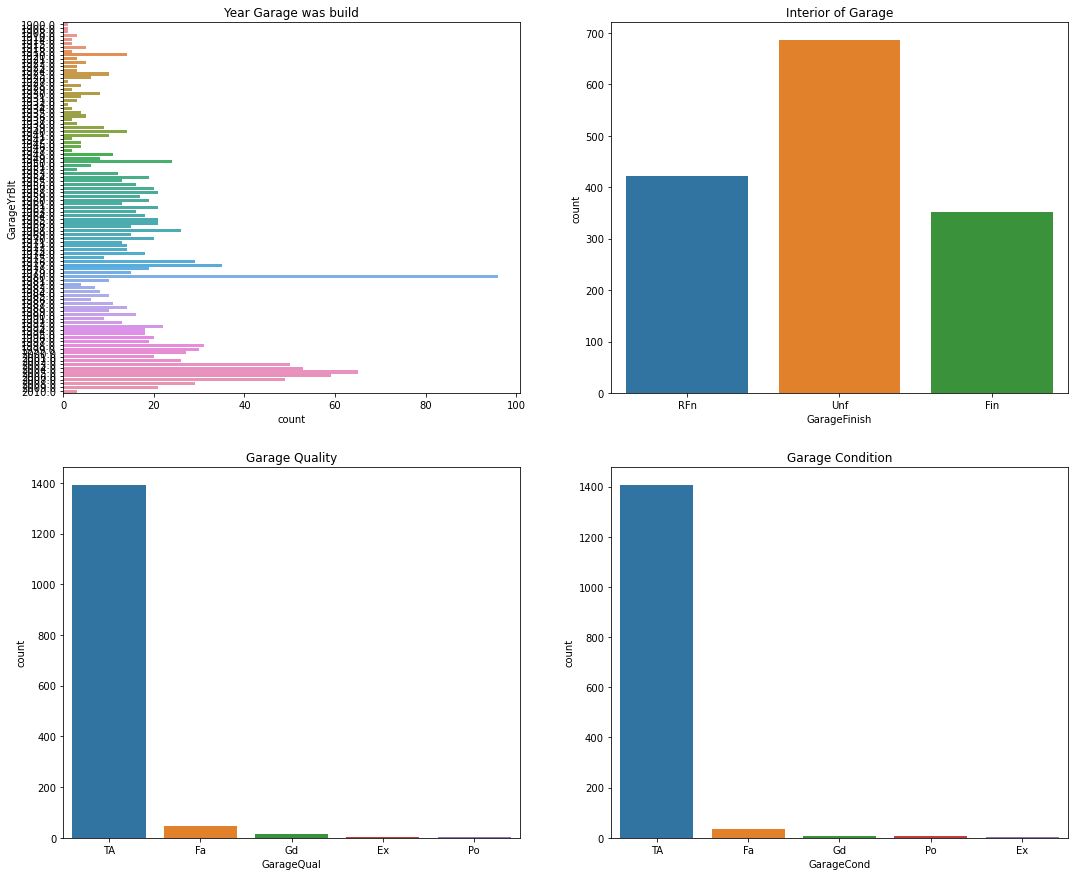

In [39]:
# Plotting count plot for columns "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"
plt.figure(figsize=(18,15))
plt.subplot(2,2,1)
sns.countplot(y=df["GarageYrBlt"])
plt.title("Year Garage was build")
plt.subplot(2,2,2)
sns.countplot(df["GarageFinish"])
plt.title("Interior of Garage")
plt.subplot(2,2,3)
sns.countplot(df["GarageQual"])
plt.title("Garage Quality")
plt.subplot(2,2,4)
sns.countplot(df["GarageCond"])
plt.title("Garage Condition")
plt.show()

In [40]:
# Again Checking Percentage of null value again
round((df.isnull().sum()/len(df.index))*100,2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea 

In [41]:
# Columns which is having null value greater than 0
null_col = {}
for i in df.columns:
    if df[i].isnull().sum() > 0:
        null_col[i] = [df[i].isnull().sum(),round((df[i].isnull().sum(axis= 0)/len(df.index))*100,2)]

# null_col = {"Column_Name": ["Count of Null Value", "Percentage of Null value"]}
null_col

# Sorting by descending "Percentage of Null value"
null_col = sorted(null_col.items(),key=(lambda x: x[1]),reverse = True)
null_col

[('BsmtExposure', [38, 2.6]),
 ('BsmtFinType2', [38, 2.6]),
 ('BsmtQual', [37, 2.53]),
 ('BsmtCond', [37, 2.53]),
 ('BsmtFinType1', [37, 2.53]),
 ('MasVnrType', [8, 0.55]),
 ('MasVnrArea', [8, 0.55]),
 ('Electrical', [1, 0.07])]

Column : `BsmtExposure`

In [42]:
# Value count
df["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [43]:
# Checking randomness of null value
df[df["BsmtExposure"].isnull()][["BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond", "BsmtFinType1"]]

,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


#### From above we can see that if `BsmtExposure` is null than `"BsmtFinType2", "BsmtQual", "BsmtCond", "BsmtFinType1"` is almost null

In [44]:
# Imputing mode inplace of null value
mode = df["BsmtExposure"].mode()
print(mode)
df["BsmtExposure"].fillna(value="No", inplace=True)

0    No
dtype: object


Column : `BsmtFinType1`

In [45]:
# Value count
df["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [46]:
# Imputing mode inplace of null value
mode = df["BsmtFinType1"].mode()
print(mode)
df["BsmtFinType1"].fillna(value="Unf", inplace=True)

0    Unf
dtype: object


Column : `BsmtFinType2`

In [47]:
# Value count
df["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [48]:
# Imputing mode inplace of null value
mode = df["BsmtFinType2"].mode()
print(mode)
df["BsmtFinType2"].fillna(value="Unf", inplace=True)

0    Unf
dtype: object


Column : `BsmtQual`

In [49]:
# Value count
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [50]:
# Imputing mode inplace of null value
mode = df["BsmtQual"].mode()
print(mode)
df["BsmtQual"].fillna(value="TA", inplace=True)

0    TA
dtype: object


Column : `BsmtCond`

In [51]:
# Value count
df["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [52]:
# Imputing mode inplace of null value
mode = df["BsmtCond"].mode()
print(mode)
df["BsmtCond"].fillna(value="TA", inplace=True)

0    TA
dtype: object


In [53]:
# Columns which is having null value greater than 0
null_col = {}
for i in df.columns:
    if df[i].isnull().sum() > 0:
        null_col[i] = [df[i].isnull().sum(),round((df[i].isnull().sum(axis= 0)/len(df.index))*100,2)]

# null_col = {"Column_Name": ["Count of Null Value", "Percentage of Null value"]}
null_col

# Sorting by descending "Percentage of Null value"
null_col = sorted(null_col.items(),key=(lambda x: x[1]),reverse = True)
null_col

[('MasVnrType', [8, 0.55]),
 ('MasVnrArea', [8, 0.55]),
 ('Electrical', [1, 0.07])]

Columns: `"MasVnrType"`, `"MasVnrArea"`

In [54]:
# Checking value of Masonary Veneer Area when Masonary Veneer Type is null.
df[df["MasVnrType"].isnull()][["MasVnrType","MasVnrArea"]]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


##### From above we can Conclude that if `MasVnrType` is null than `MasVnrArea` is also null

Column : `MasVnrType`

In [55]:
# Calculating value_count
df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [56]:
# Assigning mode to null value
df["MasVnrType"].fillna(value="None", inplace = True)

Column : `MasVnrArea`

In [57]:
# Calculating value_count
df["MasVnrArea"].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

In [58]:
# Assigning mode to null value
df["MasVnrArea"].fillna(value=0.0, inplace = True)

In [59]:
# Checking Null columns again
null_col = {}
for i in df.columns:
    if df[i].isnull().sum() > 0:
        null_col[i] = [df[i].isnull().sum(),round((df[i].isnull().sum(axis= 0)/len(df.index))*100,2)]

# null_col = {"Column_Name": ["Count of Null Value", "Percentage of Null value"]}
null_col

# Sorting by descending "Percentage of Null value"
null_col = sorted(null_col.items(),key=(lambda x: x[1]),reverse = True)
null_col

[('Electrical', [1, 0.07])]

 Columns: `Electrical`

In [60]:
# Value count of column "Electrical"
print(df["Electrical"].value_counts())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [61]:
# Filling Null value with mode
df["Electrical"].fillna(value='SBrkr', inplace = True)

In [62]:
# Again Checking Null Percentage
round((df.isnull().sum()/len(df.index))*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [63]:
# Column which are dropped are
drop_col = []
for i in house_sale.columns:
    if i not in df.columns:
        drop_col.append(i)
drop_col

['Alley']

In [64]:
# Shape of dataset
df.shape

(1460, 80)

In [65]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

##### Visulaizing Dataset

Categorical Column

In [66]:
object_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        object_col.append(i)
print(object_col)
print(len(object_col))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
42


##### Univariate Analysis

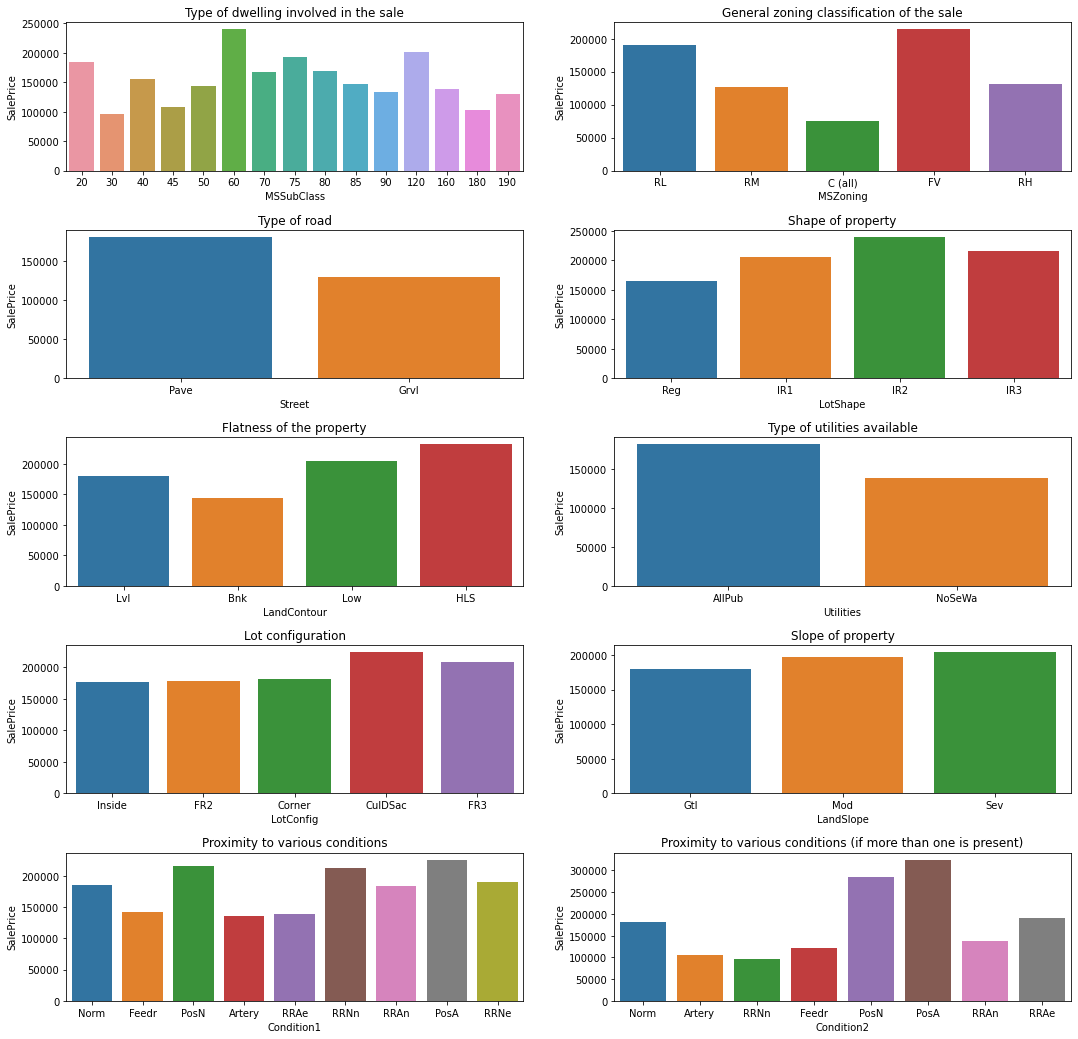

In [67]:
# Columns "MSSubClass", "MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Condition1", "Condition2"
col_1 = ["MSSubClass", "MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Condition1", "Condition2"]

desc_1 = ["Type of dwelling involved in the sale", "General zoning classification of the sale", "Type of road", "Shape of property",
         "Flatness of the property", "Type of utilities available", "Lot configuration", "Slope of property", "Proximity to various conditions",
         "Proximity to various conditions (if more than one is present)"]
plt.figure(figsize=(18,18))
plt.subplots_adjust(hspace=0.4)

for i in range(len(col_1)):
    plt.subplot(5,2,i+1)
    sns.barplot(x=df[col_1[i]], y=df["SalePrice"],ci=None)
    plt.title(desc_1[i])
plt.show()

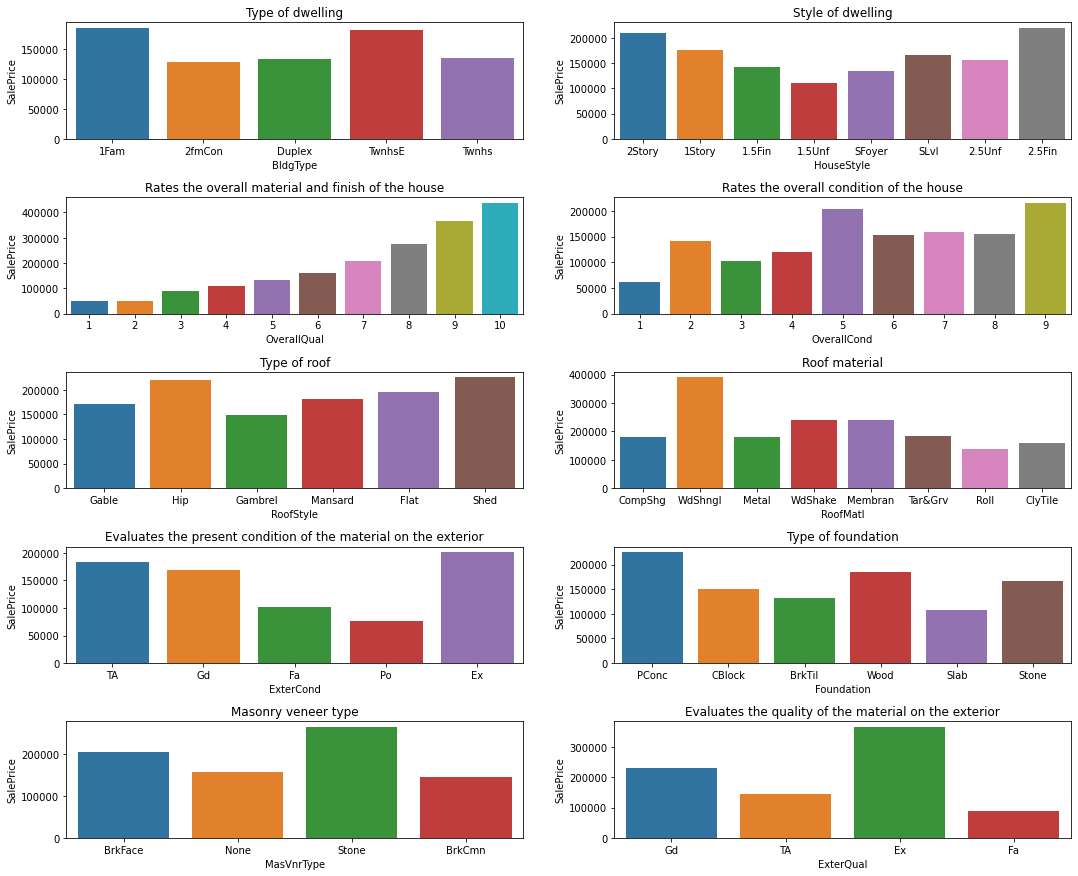

In [68]:
# Columns "BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle", "RoofMatl", "ExterCond", "Foundation", "MasVnrType", "ExterQual"
col_2 = ["BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle", "RoofMatl", "ExterCond", "Foundation", "MasVnrType", "ExterQual"]

desc_2 = ["Type of dwelling", "Style of dwelling", "Rates the overall material and finish of the house", "Rates the overall condition of the house",
         "Type of roof", "Roof material", "Evaluates the present condition of the material on the exterior", "Type of foundation","Masonry veneer type",
         "Evaluates the quality of the material on the exterior"]

plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=0.5)

for i in range(len(col_2)):
    plt.subplot(5,2,i+1)
    sns.barplot(x=df[col_2[i]], y=df["SalePrice"], ci= None)
    plt.title(desc_2[i])

plt.show()

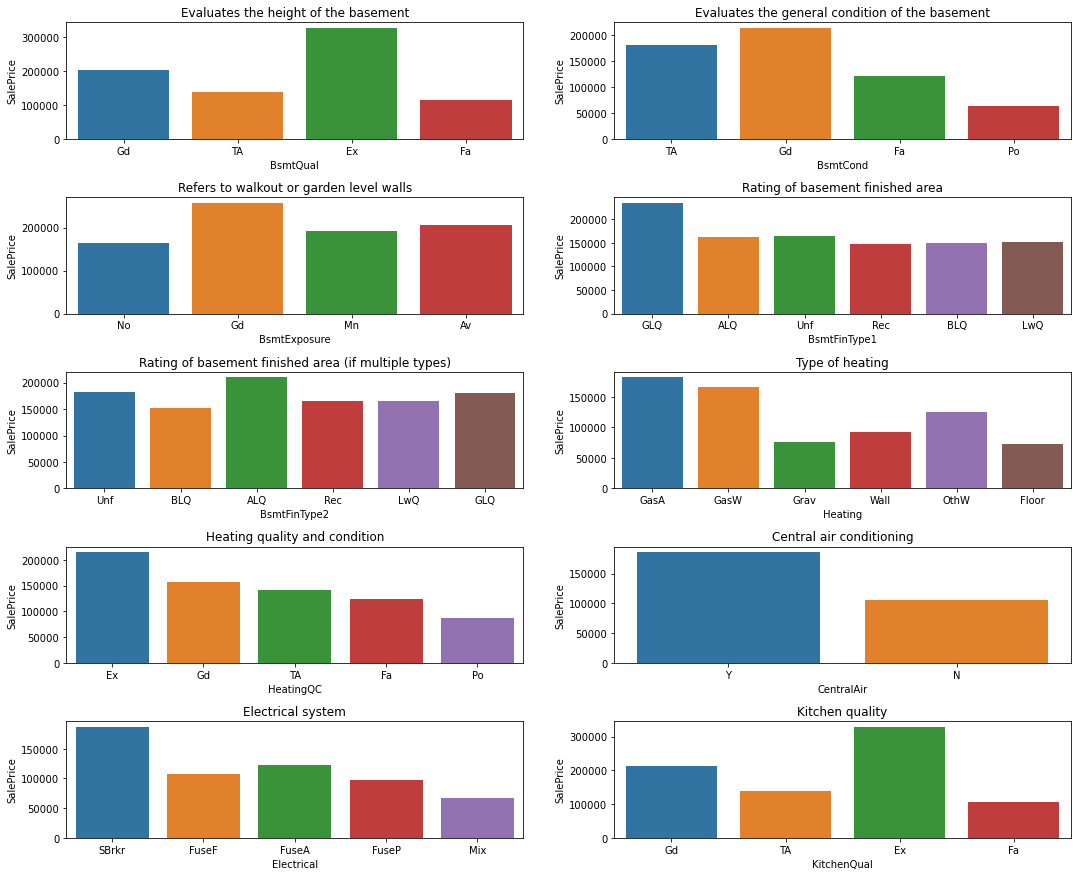

In [69]:
# Columns "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual"
col_3 = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", 
         "KitchenQual"]

desc_3 = ["Evaluates the height of the basement", "Evaluates the general condition of the basement", "Refers to walkout or garden level walls",
         "Rating of basement finished area", "Rating of basement finished area (if multiple types)", "Type of heating", "Heating quality and condition",
         "Central air conditioning", "Electrical system", "Kitchen quality"]

plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=0.5)

for i in range(len(col_3)):
    plt.subplot(5,2,i+1)
    sns.barplot(x=df[col_3[i]], y=df["SalePrice"], ci=None)
    plt.title(desc_3[i])

plt.show()

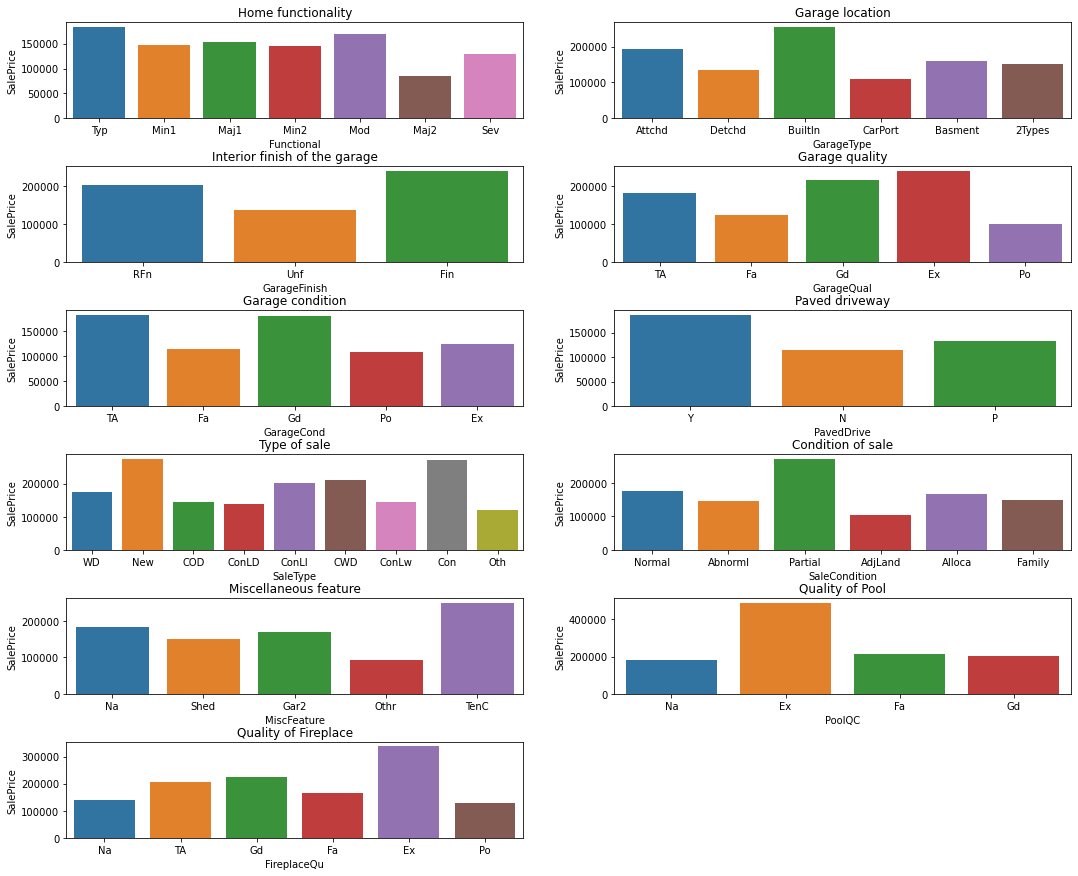

In [70]:
# Columns "Functional", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "SaleCondition", "MiscFeature", "PoolQC",
# "FireplaceQu"
col_4 = ["Functional", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "SaleCondition", "MiscFeature", 
         "PoolQC", "FireplaceQu"]

desc_4 = ["Home functionality", "Garage location", "Interior finish of the garage", "Garage quality", "Garage condition", "Paved driveway",
         "Type of sale", "Condition of sale", "Miscellaneous feature", "Quality of Pool", "Quality of Fireplace"]

plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=0.5)

for i in range(len(col_4)):
    plt.subplot(6,2,i+1)
    sns.barplot(x=df[col_4[i]], y=df["SalePrice"], ci=None)
    plt.title(desc_4[i])

plt.show()

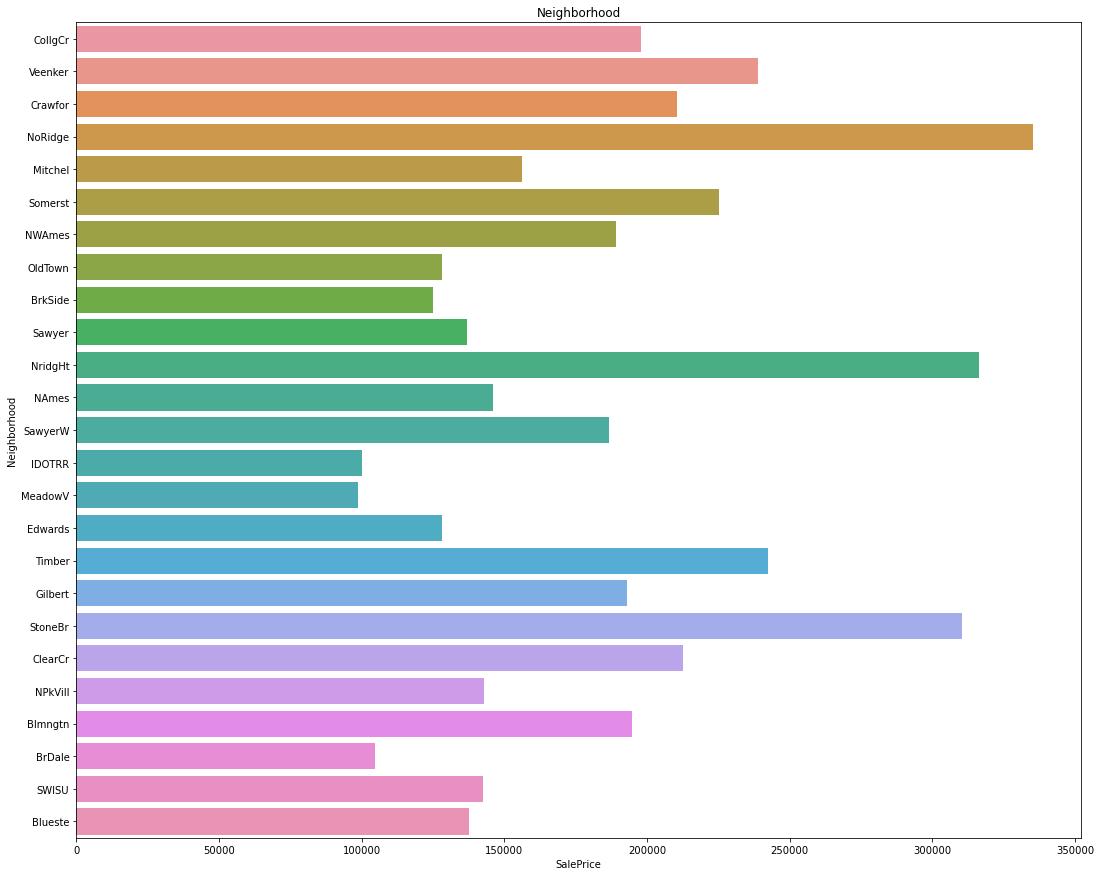

In [71]:
# Columns = "Neighborhood"
plt.figure(figsize=(18,15))
sns.barplot(data=df, x=df["SalePrice"], y=df["Neighborhood"], ci=None)
plt.title("Neighborhood")
plt.show()

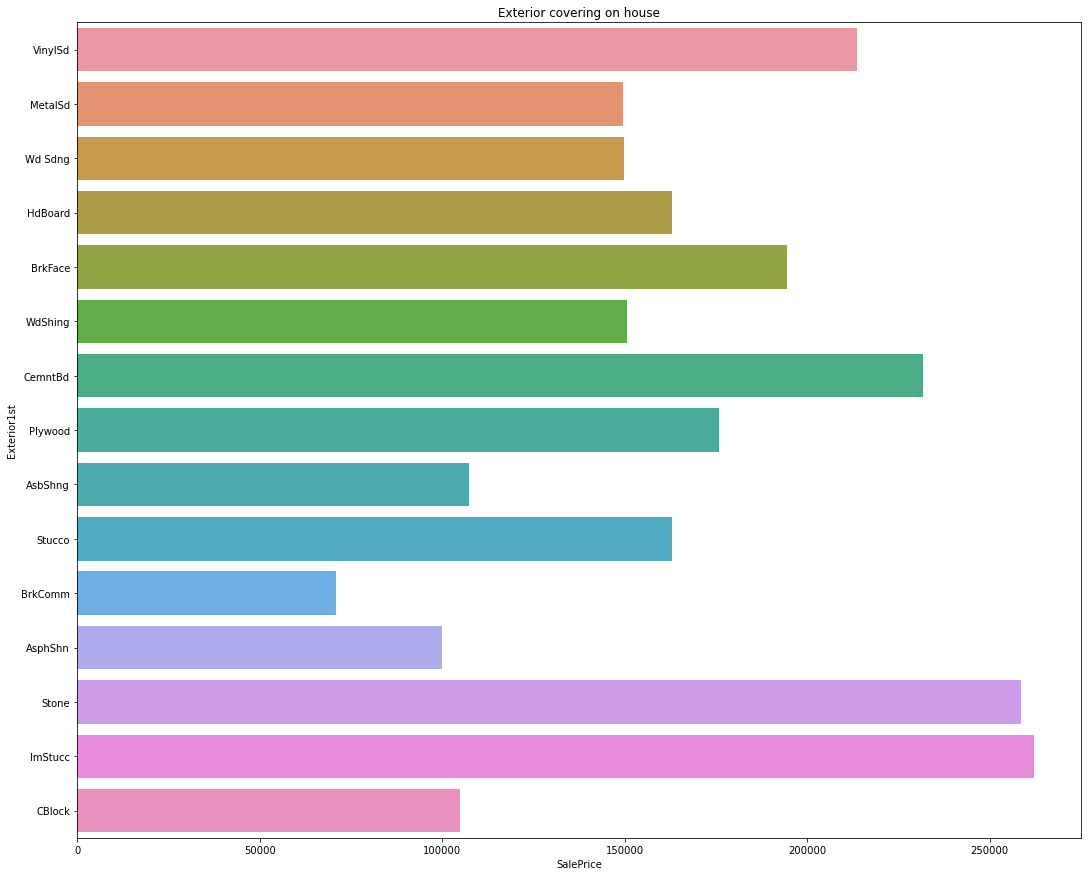

In [72]:
# Columns = "Exterior1st"
plt.figure(figsize=(18,15))
sns.barplot(data=df, x=df["SalePrice"], y=df["Exterior1st"], ci=None)
plt.title("Exterior covering on house")
plt.show()

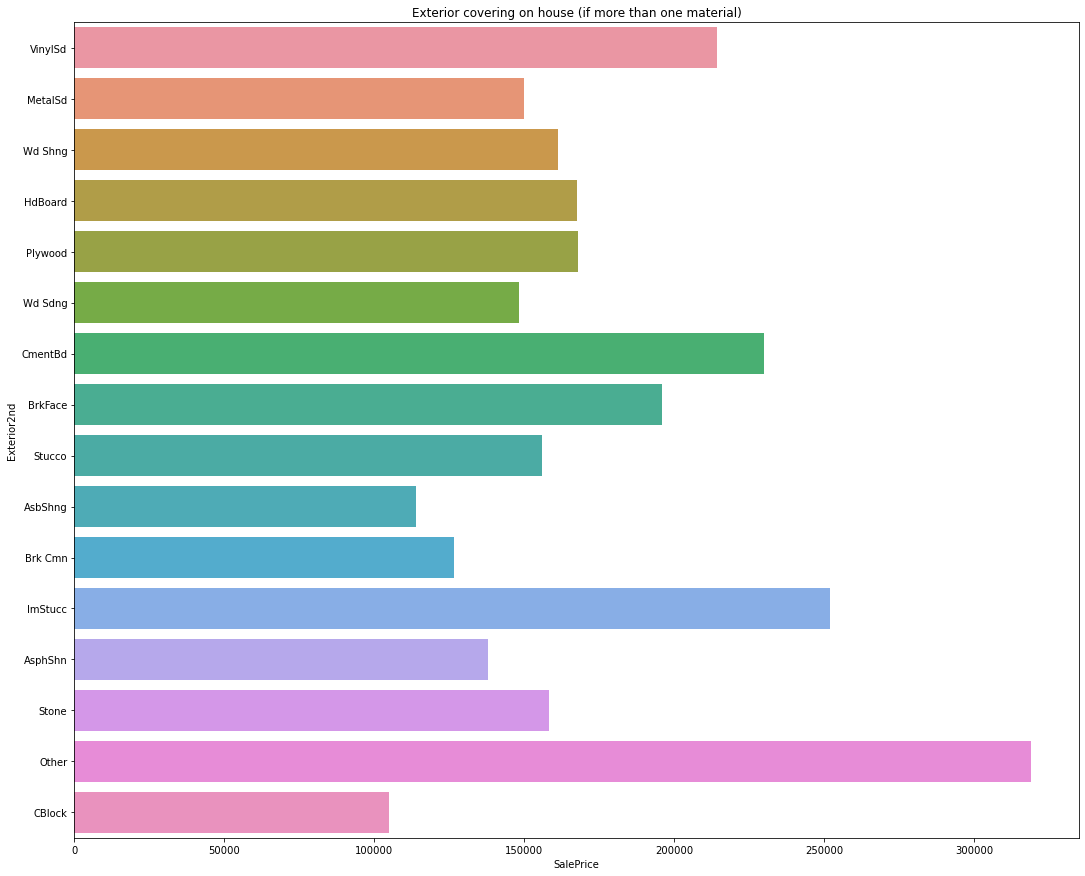

In [73]:
# Columns = "Exterior2nd"
plt.figure(figsize=(18,15))
sns.barplot(data=df, x=df["SalePrice"], y=df["Exterior2nd"], ci=None)
plt.title("Exterior covering on house (if more than one material)")
plt.show()

#### Boxplot

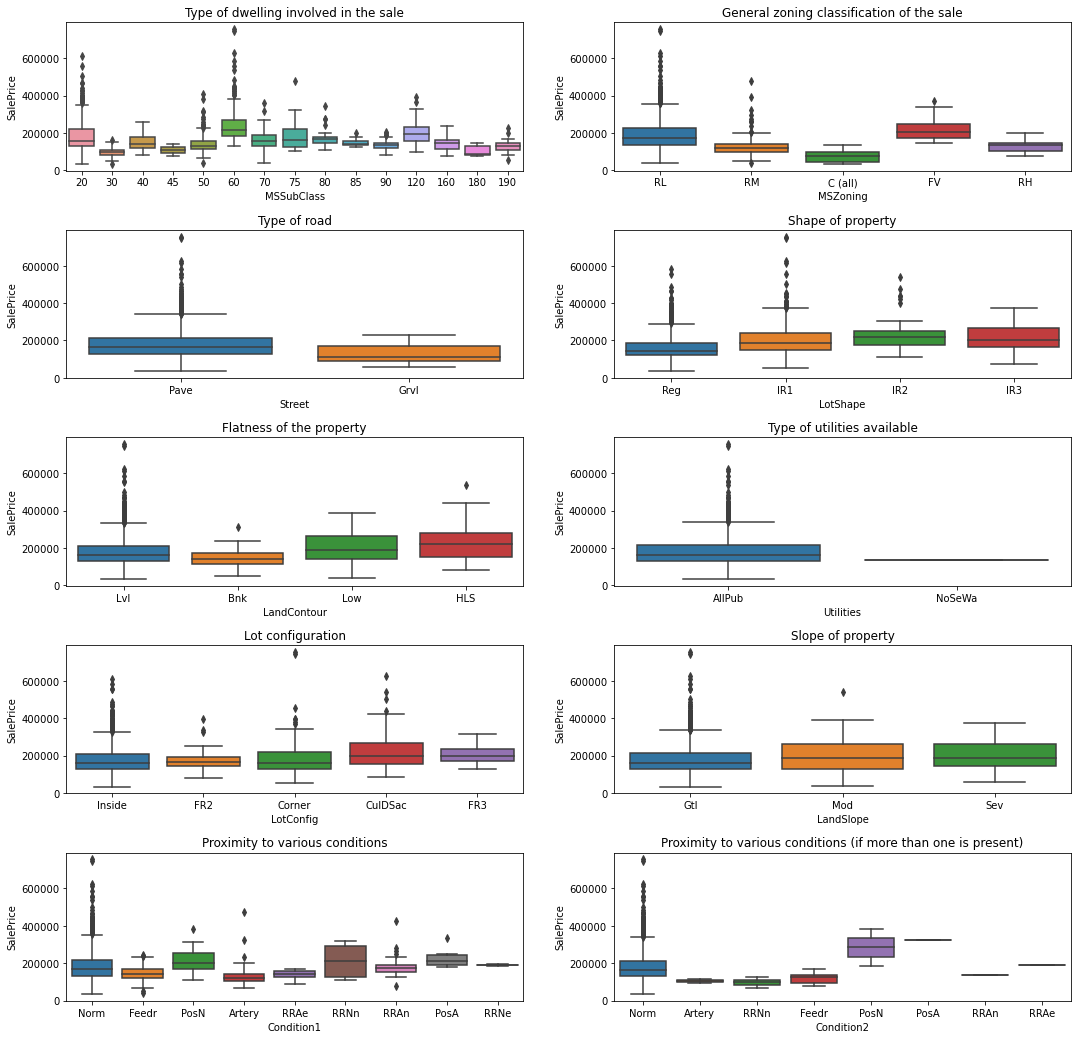

In [74]:
# Boxplot
plt.figure(figsize=(18,18))
plt.subplots_adjust(hspace=0.4)

for i in range(len(col_1)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=df[col_1[i]], y=df["SalePrice"])
    plt.title(desc_1[i])
plt.show()

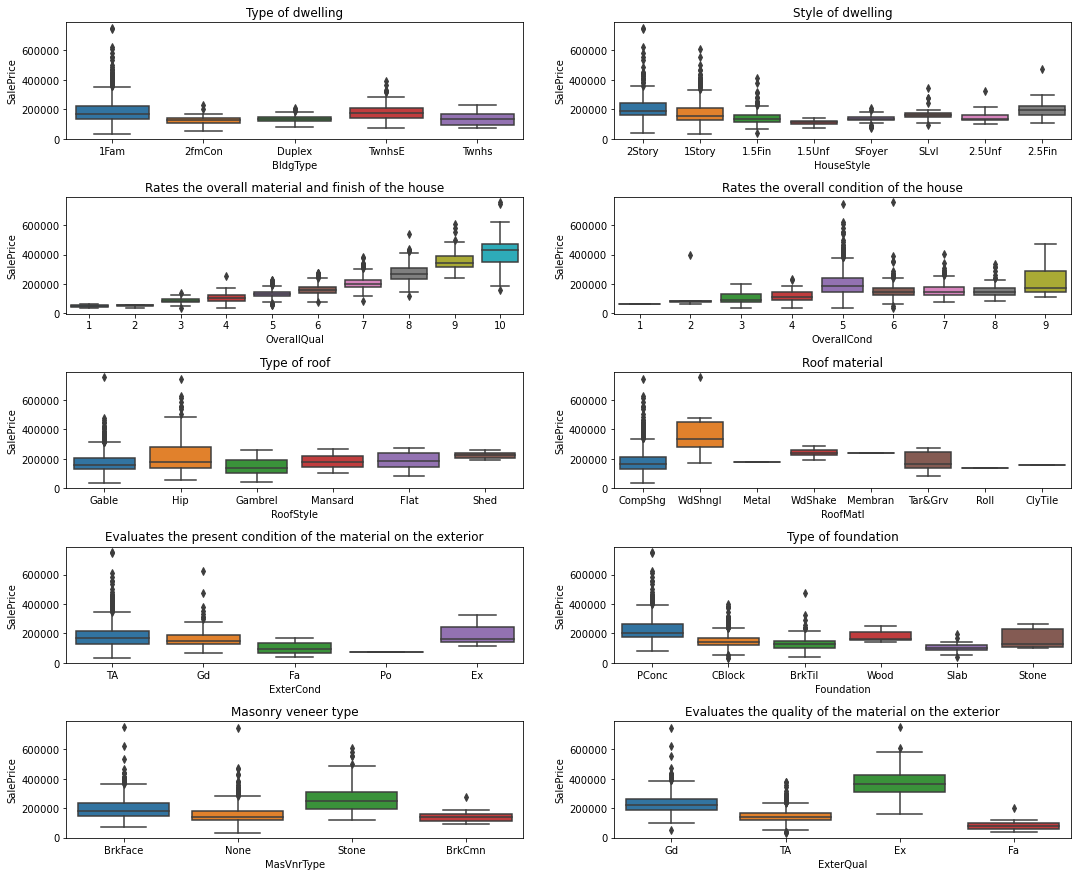

In [75]:
plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=0.5)

for i in range(len(col_2)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=df[col_2[i]], y=df["SalePrice"])
    plt.title(desc_2[i])

plt.show()

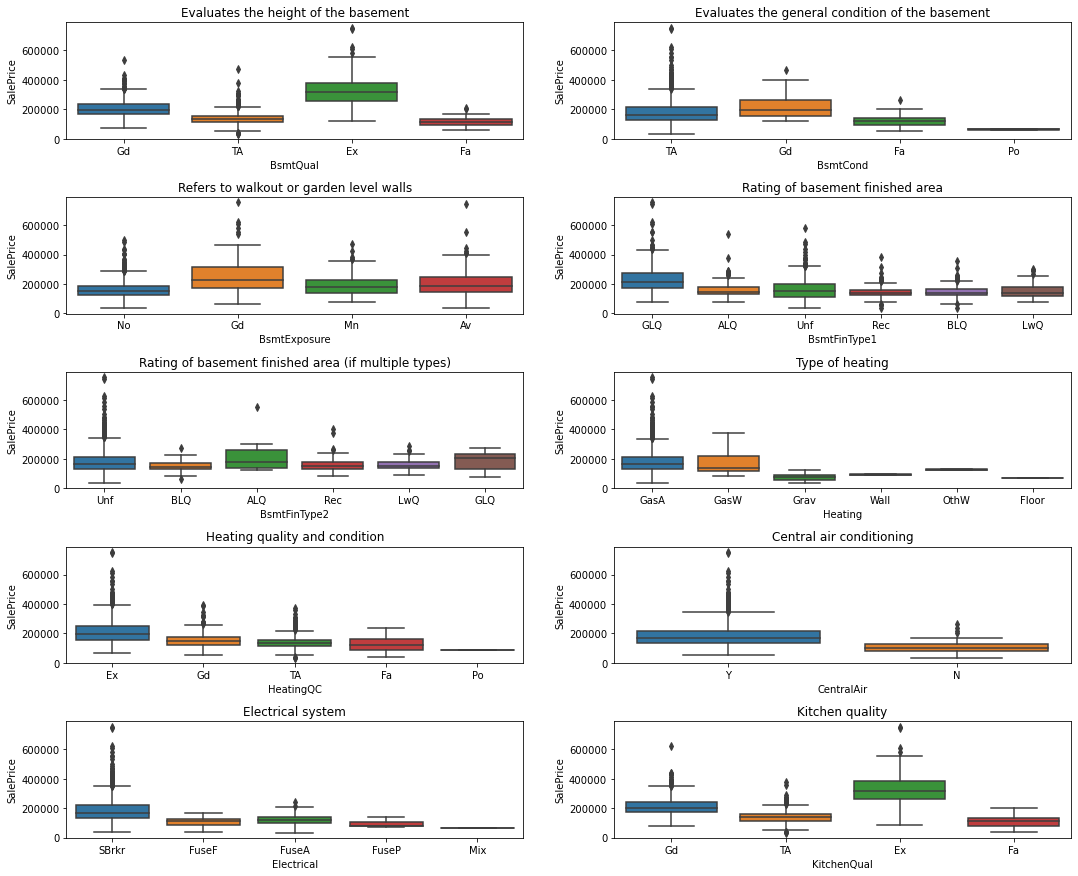

In [76]:
plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=0.5)

for i in range(len(col_3)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=df[col_3[i]], y=df["SalePrice"])
    plt.title(desc_3[i])

plt.show()

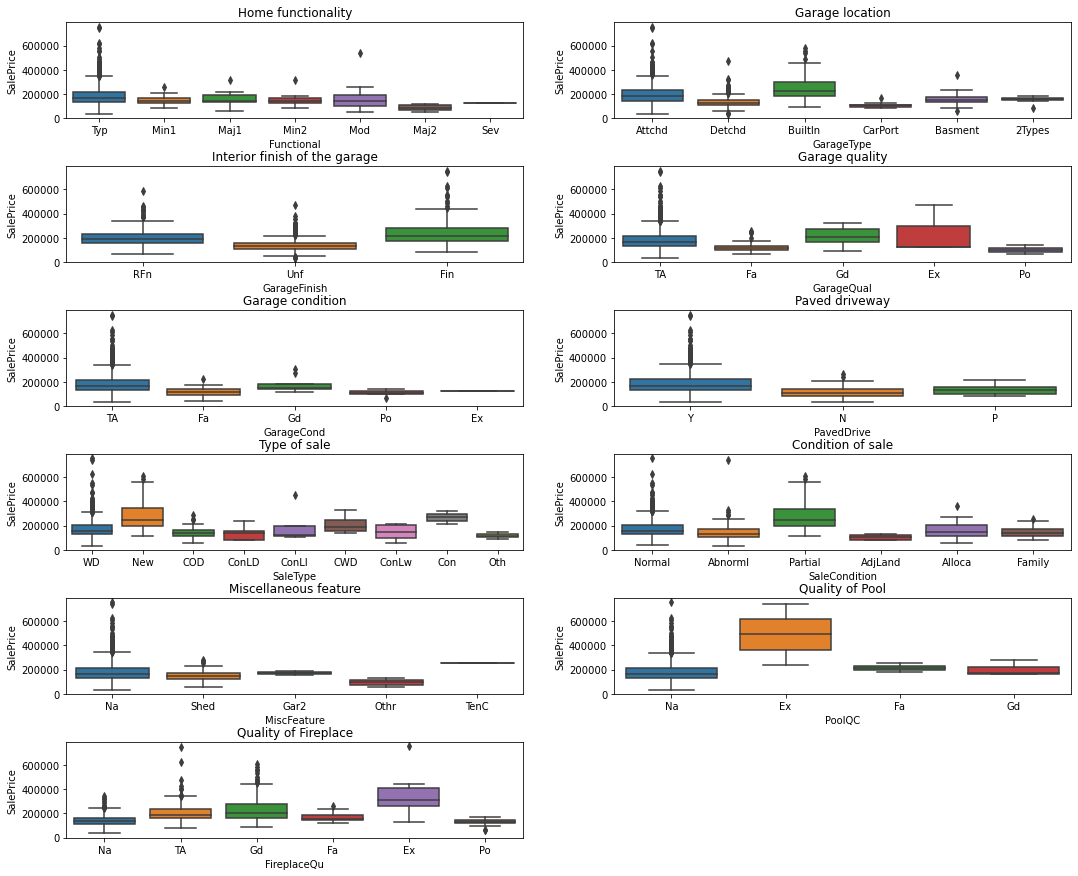

In [77]:
plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=0.5)

for i in range(len(col_4)):
    plt.subplot(6,2,i+1)
    sns.boxplot(x=df[col_4[i]], y=df["SalePrice"])
    plt.title(desc_4[i])

plt.show()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Continuous Variable

#### Bivariate Analysis

In [79]:
# Creating new dataset of continuous variable
df_numeric = df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [80]:
# Dropping column "Id"
df_numeric.drop(columns="Id", inplace=True)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


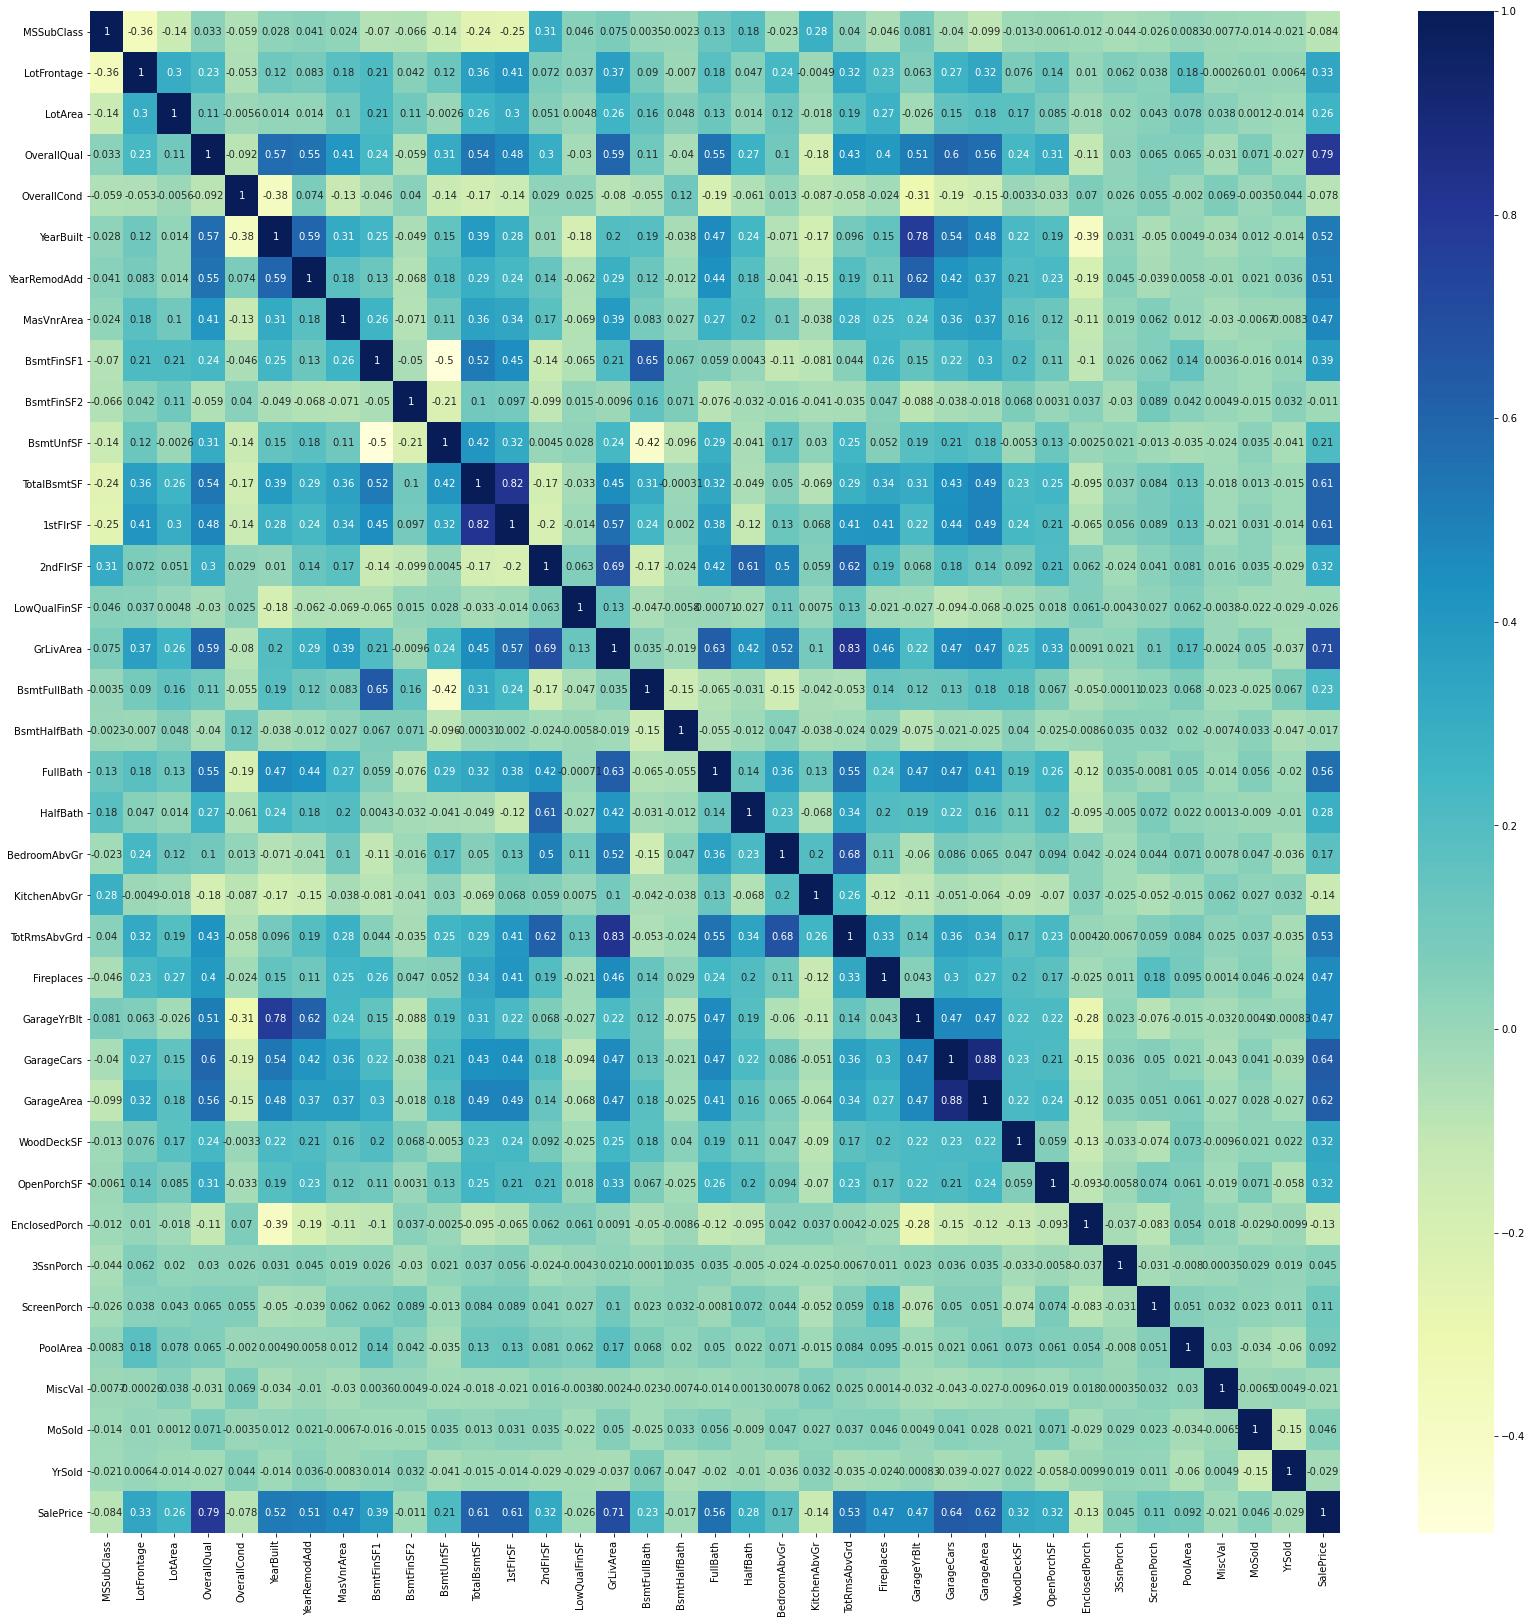

In [81]:
# Plotting Heat map
plt.figure(figsize=(28,28))
sns.heatmap(df_numeric.corr(),cmap="YlGnBu", annot=True)
plt.show()

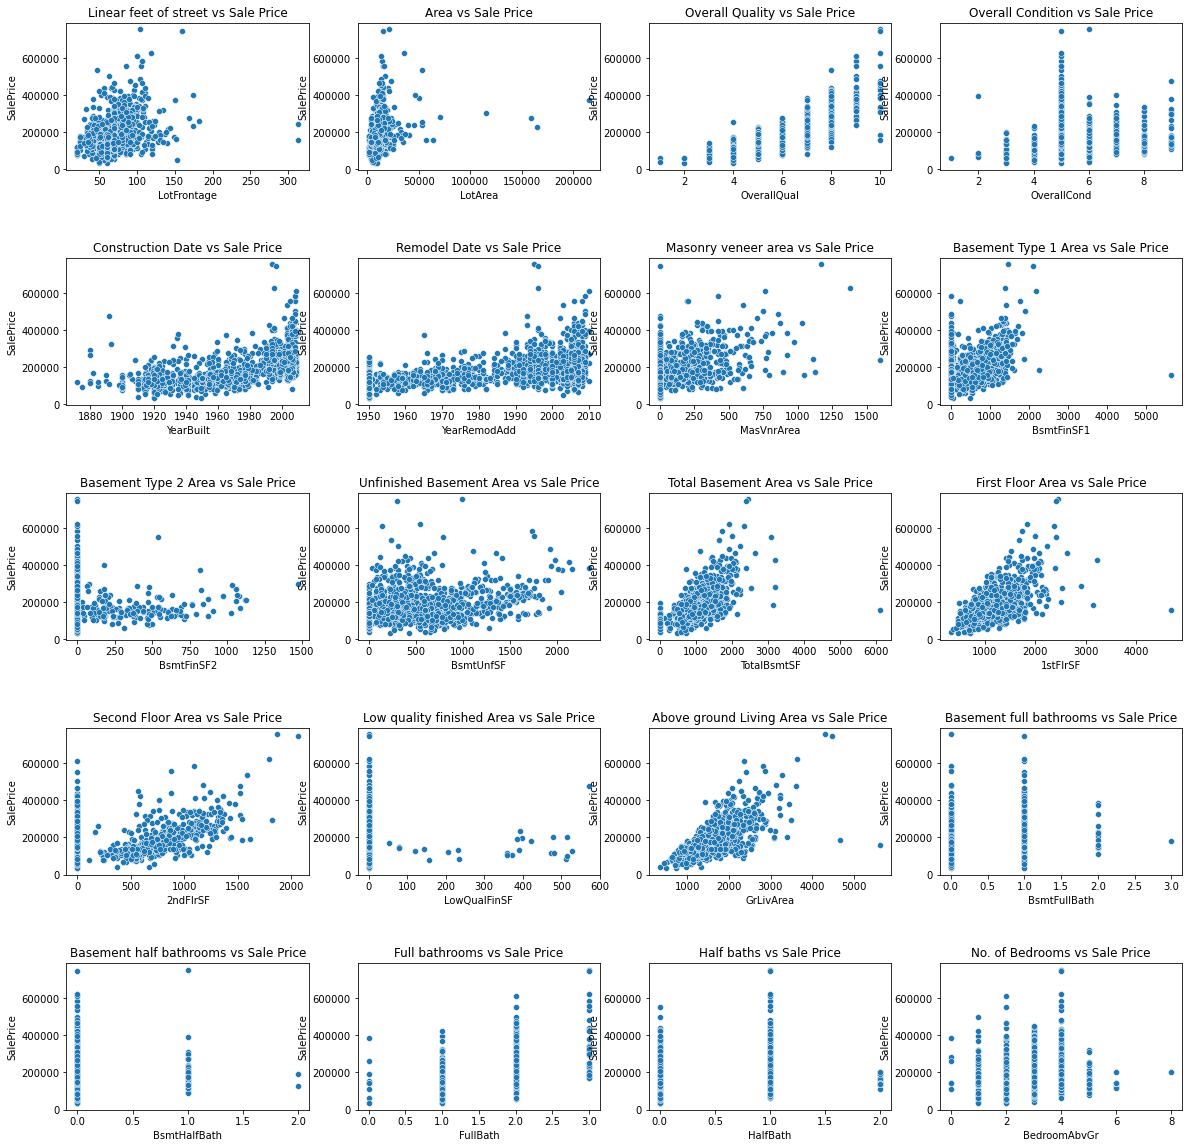

In [82]:
# Scatter plot

cont_col = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1",
           "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath",
           "BsmtHalfBath", "FullBath", "HalfBath","BedroomAbvGr"]
col_info = ["Linear feet of street", "Area", "Overall Quality", "Overall Condition", "Construction Date", "Remodel Date", "Masonry veneer area",
           "Basement Type 1 Area", "Basement Type 2 Area", "Unfinished Basement Area","Total Basement Area", "First Floor Area",
           "Second Floor Area", "Low quality finished Area", "Above ground Living Area", "Basement full bathrooms", "Basement half bathrooms",
           "Full bathrooms", "Half baths", "No. of Bedrooms"]
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.6)
for i in range(20):
    plt.subplot(5,4,i+1)
    sns.scatterplot(x=df[cont_col[i]] , y=df["SalePrice"])
    plt.title(col_info[i]+" vs Sale Price")
plt.show()

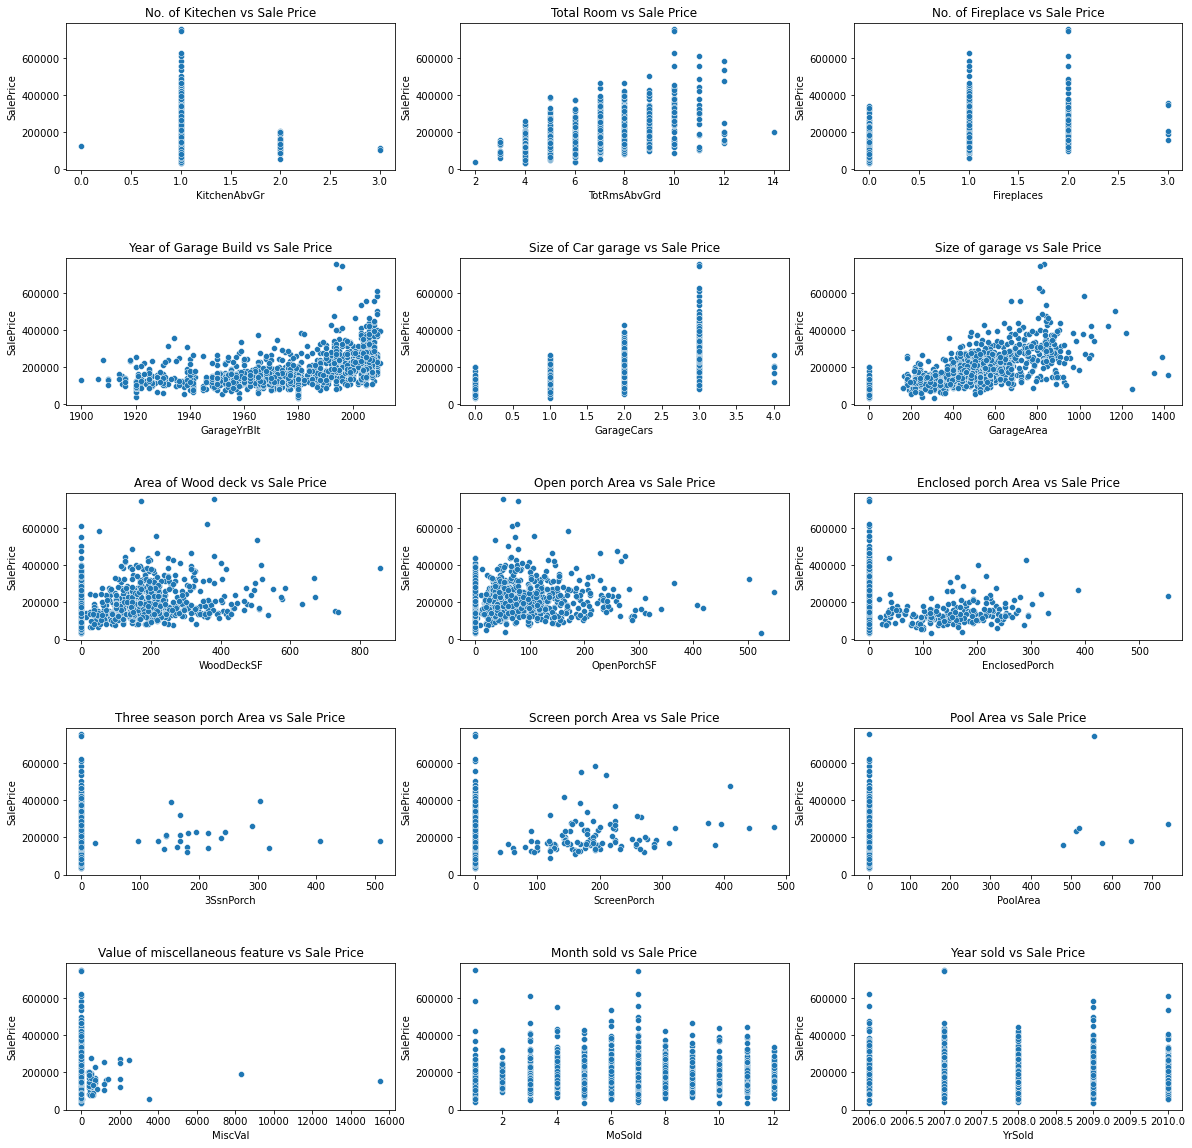

In [83]:
# Scatter plot

cont_col = ["KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF",
           "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]

col_info = ["No. of Kitechen", "Total Room", "No. of Fireplace","Year of Garage Build", "Size of Car garage", "Size of garage", 
            "Area of Wood deck","Open porch Area", "Enclosed porch Area", "Three season porch Area","Screen porch Area", 
           "Pool Area", "Value of miscellaneous feature", "Month sold", "Year sold"]
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.6)
for i in range(15):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df[cont_col[i]] , y=df["SalePrice"])
    plt.title(col_info[i]+" vs Sale Price")
plt.show()

### Step-3: Data Preparation 


##### Data Preparation

In [84]:
# Converting Ordinal Categorical into continous
ord_col = ["PoolQC", "FireplaceQu", "GarageQual", "GarageCond", "BsmtQual", "BsmtCond", "KitchenQual", 
           "HeatingQC", "ExterQual", "ExterCond"]
# Unique value of Ordinal Categorical
for i in ord_col:
    print(df[i].value_counts())

Na    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64
Na    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


In [85]:
# Assigning value
# 0 - No Present ("Na")
# 1 - Poor ("Po")
# 2 - Fair ("Fa")
# 3 - Average ("TA")
# 4 - Good ("Gd")
# 5 - Excellent ("Ex")
def mapping_1(x):
    return x.map({"Na":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
df[ord_col]= df[ord_col].apply(mapping_1)
df[ord_col]

,PoolQC,FireplaceQu,GarageQual,GarageCond,BsmtQual,BsmtCond,KitchenQual,HeatingQC,ExterQual,ExterCond
0,0,0,3,3,4,3,4,5,4,3
1,0,3,3,3,4,3,3,5,3,3
2,0,3,3,3,4,3,4,5,4,3
3,0,4,3,3,3,4,4,4,3,3
4,0,3,3,3,4,3,4,5,4,3
5,0,0,3,3,4,3,3,5,3,3
6,0,4,3,3,5,3,4,5,4,3
7,0,3,3,3,4,3,3,5,3,3
8,0,3,2,3,3,3,3,4,3,3
9,0,3,4,3,3,3,3,5,3,3


In [86]:
# Column "BsmtExposure"
# "No" - 0, "Mn" - 1, "Av" - 2, "Gd" - 3
def mapping_2(x):
    if x == "No" : return 0
    elif x == "Mn" : return 1
    elif x == "Av" : return 2
    else: return 3
df["BsmtExposure"] = df["BsmtExposure"].apply(mapping_2)

# Column "BsmtFinType1", "BsmtFinType2"
# "Unf" - 1, "LwQ" - 2, "Rec" - 3, "BLQ" - 4, "ALQ" - 5, "GLQ" - 6
def mapping_3(x):
    if x == "Unf" : return 1
    elif x == "LwQ" : return 2
    elif x == "Rec" : return 3
    elif x == "BLQ" : return 4
    elif x == "ALQ" : return 5
    else: return 6
df["BsmtFinType1"] = df["BsmtFinType1"].apply(mapping_3)
df["BsmtFinType2"] = df["BsmtFinType2"].apply(mapping_3)

# Column "CentralAir"
# "No" - 0, "Yes" - 1
def mapping_4(x):
    if x == "N" : return 0
    else : return 1
df["CentralAir"] = df["CentralAir"].apply(mapping_4)

# Column "Functional"
# "Sal" - 0, "Sev" - 1, "Maj2" - 2, "Maj1" - 3, "Mod" - 4, "Min2" - 5, "Min1" - 6, "Typ" - 7
def mapping_5(x):
    if x == "Sal" :return  0
    elif x == "Sev" : return 1
    elif x == "Maj2" : return 2
    elif x == "Maj1" : return 3
    elif x == "Mod" : return 4
    elif x == "Min2" : return 5
    elif x == "Min1" : return 6
    else: return 7
df["Functional"] = df["Functional"].apply(mapping_5)

# Column "GarageFinish"
# "Unf" - 1, "RFn" - 2, "Fin" - 3
def mapping_6(x):
    if x == "Unf" : return 1
    elif x == "RFn" : return 2
    else: return 3
df["GarageFinish"] = df["GarageFinish"].apply(mapping_6)

# Column "PavedDrive"
# "N" - 0, "P" - 1, "Y" - 2
def mapping_7(x):
    if x == "N" : return 0
    elif x == "P" : return 1
    else: return 2
df["PavedDrive"] = df["PavedDrive"].apply(mapping_7)

In [87]:
# Dealing with column "Neighborhood"
# converting into Lower case
df["Neighborhood"] = df["Neighborhood"].apply(lambda x: x.lower())
# value counts
df["Neighborhood"].value_counts()

names      225
collgcr    150
oldtown    113
edwards    100
somerst     86
gilbert     79
nridght     77
sawyer      74
nwames      73
sawyerw     59
brkside     58
crawfor     51
mitchel     49
noridge     41
timber      38
idotrr      37
clearcr     28
stonebr     25
swisu       25
blmngtn     17
meadowv     17
brdale      16
veenker     11
npkvill      9
blueste      2
Name: Neighborhood, dtype: int64

In [88]:
# Taking top 10 Neighborhood rest mark as Other
top_10 = list(df["Neighborhood"].value_counts()[:10].index)
top_10
code = ["Names", "CollgCr", "OldTown", "Edwards", "Somerst", "Gilbert", "NridgHt", "Sawyer", "NWAmes", "SawyerW"]
# mapping function
def mapping_8(x):
    if x in top_10:
        for i in range(len(top_10)):
            if x == top_10[i]: return code[i]
    else: return "Other"

# Applying function
df["Neighborhood"] = df["Neighborhood"].apply(mapping_8)

In [89]:
# converting column "MSSubClass"
df["MSSubClass"] = df["MSSubClass"].astype('object')

##### Creating new column

In [90]:
# Creating a new column Total age
df["Total_Age"] = df["YrSold"] - df["YearBuilt"]

In [91]:
# Creating a New column "Age"
df["Renewed_Age"] = df["YrSold"] - df["YearRemodAdd"]

In [92]:
# Dropping columns
df.drop(columns=["YrSold", "YearRemodAdd", "YearBuilt"], inplace=True)

##### Dummy variables

In [93]:
# Column which have datatype "Object"
cat_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)

In [94]:
# Creating Dummy variable for object 
dummy_variable = pd.get_dummies(df[cat_col], drop_first=True)
dummy_variable.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [95]:
# Appending dummy column and orignal column
df_new = pd.concat([df, dummy_variable], axis=1)
df_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0


In [96]:
# Dropping orignal column
df_new.drop(columns=cat_col, inplace=True)

In [97]:
# Checking shape of dataset
df_new.shape

(1460, 205)

In [98]:
# Dropping "ID" column
df_new.drop(columns="Id", inplace=True)

##### Splitting Dataset

In [99]:
# Importing Library
from sklearn.model_selection import train_test_split

In [100]:
# Splitting into X_train, X_test, y_train, y_test
np.random.seed(0)
df_train, df_test = train_test_split(df_new, test_size = 0.3, random_state = 100)

##### Sacling

In [101]:
# Using Standardize scaling
from sklearn.preprocessing import MinMaxScaler
# Creating object
scaler = MinMaxScaler()

In [102]:
# assigning columns into new variable
col = df_train.columns
# Sacling values
df_train[col] = scaler.fit_transform(df_train[col])
df_test[col] = scaler.transform(df_test[col])

In [103]:
# Splitting into Dependent and Independent Variable
y_train = df_train.pop("SalePrice")
X_train = df_train
y_test = df_test.pop("SalePrice")
X_test = df_test

In [104]:
# Shape of Test and Train
print("Shape of Train : {}".format(X_train.shape))
print("Shape of Test : {}".format(X_test.shape))

Shape of Train : (1022, 203)
Shape of Test : (438, 203)


### Step-4: Model Building and Evaluation

### Creating Model 

#### Using Ridge Regression

In [105]:
# Importing Library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [106]:
# Ridge Regression model
# creating list of alphas
param = {"alpha":[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Creating object
ridge = Ridge()

# Creating 5 folds
folds = 5

# creating model
model_ridge_1 = GridSearchCV(estimator=ridge,
                          param_grid=param,
                          scoring='neg_mean_absolute_error',
                           cv=folds,
                          return_train_score=True,
                          verbose=1)
# Using sorted(sklearn.metrics.SCORERS.keys()) for scoring values

# Fitting into model
model_ridge_1.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Finding best alpha value
print(model_ridge_1.best_estimator_)

Ridge(alpha=10)


In [108]:
# Again doing ridge regression for alpha
# Ridge Regression model
# creating list of alphas
param = {"alpha":[2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70]}

# Creating object
ridge = Ridge()

# Creating 5 folds
folds = 5

# creating model
model_ridge_2 = GridSearchCV(estimator=ridge,
                          param_grid=param,
                          scoring='neg_mean_absolute_error',
                           cv=folds,
                          return_train_score=True,
                          verbose=1)
# Using sorted(sklearn.metrics.SCORERS.keys()) for scoring values

# Fitting into model
model_ridge_2.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                                   60, 70]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
# Finding best alpha value
print(model_ridge_2.best_estimator_)

Ridge(alpha=5)


In [110]:
# Using cv result
cv_result_ridge = pd.DataFrame(model_ridge_2.cv_results_)
cv_result_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038702,0.011320,0.012202,0.002042,2,{'alpha': 2},-0.026792,-0.031315,-0.031942,-0.026570,...,-0.028905,0.002278,9,-0.024208,-0.020983,-0.023029,-0.024460,-0.024255,-0.023387,0.001303
1,0.033397,0.003070,0.011202,0.000979,3,{'alpha': 3},-0.026333,-0.031504,-0.031748,-0.026346,...,-0.028764,0.002405,6,-0.024631,-0.021474,-0.023298,-0.024871,-0.024664,-0.023788,0.001284
2,0.037636,0.003096,0.012617,0.001358,4,{'alpha': 4},-0.025997,-0.031692,-0.031622,-0.026201,...,-0.028679,0.002519,3,-0.024954,-0.021864,-0.023558,-0.025152,-0.024971,-0.024100,0.001256
3,0.039199,0.007414,0.011201,0.000747,5,{'alpha': 5},-0.025738,-0.031885,-0.031574,-0.026181,...,-0.028658,0.002613,1,-0.025226,-0.022209,-0.023806,-0.025376,-0.025212,-0.024366,0.001220
4,0.028400,0.001626,0.009601,0.000489,6,{'alpha': 6},-0.025627,-0.032048,-0.031538,-0.026203,...,-0.028674,0.002664,2,-0.025465,-0.022512,-0.024027,-0.025568,-0.025420,-0.024598,0.001187
5,0.027400,0.002414,0.009399,0.000490,7,{'alpha': 7},-0.025579,-0.032183,-0.031529,-0.026227,...,-0.028705,0.002701,4,-0.025669,-0.022787,-0.024228,-0.025745,-0.025608,-0.024808,0.001156
6,0.026600,0.002333,0.010603,0.001020,8,{'alpha': 8},-0.025551,-0.032295,-0.031543,-0.026268,...,-0.028745,0.002729,5,-0.025874,-0.023037,-0.024419,-0.025924,-0.025792,-0.025009,0.001134
7,0.032401,0.009913,0.010801,0.000749,9,{'alpha': 9},-0.025530,-0.032394,-0.031551,-0.026334,...,-0.028794,0.002745,7,-0.026058,-0.023272,-0.024611,-0.026082,-0.025956,-0.025196,0.001109
8,0.028400,0.002332,0.009801,0.000401,10,{'alpha': 10},-0.025504,-0.032484,-0.031588,-0.026396,...,-0.028848,0.002766,8,-0.026225,-0.023492,-0.024784,-0.026228,-0.026110,-0.025368,0.001085
9,0.028601,0.003553,0.011002,0.001265,20,{'alpha': 20},-0.025423,-0.033270,-0.031903,-0.026908,...,-0.029389,0.002942,10,-0.027588,-0.025114,-0.026102,-0.027471,-0.027334,-0.026722,0.000965


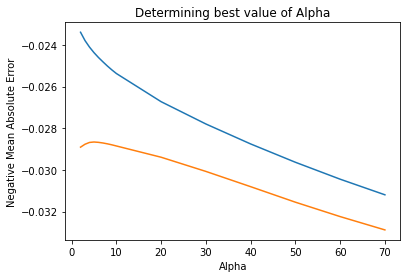

In [111]:
# Plotting graph between mean train score and mean test score
plt.figure()
plt.plot(cv_result_ridge["param_alpha"], cv_result_ridge["mean_train_score"])
plt.plot(cv_result_ridge["param_alpha"], cv_result_ridge["mean_test_score"])
plt.ylabel("Negative Mean Absolute Error")
plt.xlabel("Alpha")
plt.title("Determining best value of Alpha")
plt.show()

#### Using Lasso Regression

In [112]:
# Importing Library
from sklearn.linear_model import Lasso

In [113]:
# Creating model Lasso for best alpha and best predictor
# creating list of alphas
param = {"alpha":[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Creating object for model
lasso = Lasso()

# Selecting fold as 5
folds = 5

# Creating model
model_lasso_1 = GridSearchCV(estimator=lasso,
                          param_grid=param,
                          scoring='neg_mean_absolute_error',
                          cv=folds,
                          return_train_score=True,
                          verbose=1)

# Fitting in model
model_lasso_1.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
# Finding best alpha value
print(model_lasso_1.best_estimator_)

Lasso(alpha=0.0001)


In [115]:
# Again doing lasso regression for alpha
# creating list of alphas
param = {"alpha":[0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

# Creating object for model
lasso = Lasso()

# Selecting fold as 5
folds = 5

# Creating model
model_lasso_2 = GridSearchCV(estimator=lasso,
                          param_grid=param,
                          scoring='neg_mean_absolute_error',
                          cv=folds,
                          return_train_score=True,
                          verbose=1)

# Fitting in model
model_lasso_2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Finding best alpha value
print(model_lasso_2.best_estimator_)

Lasso(alpha=0.0002)


In [117]:
# Using cv result
cv_result_lasso = pd.DataFrame(model_lasso_2.cv_results_)
cv_result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.257811,0.074729,0.009593,0.000482,5e-05,{'alpha': 5e-05},-0.026024,-0.029931,-0.031149,-0.026804,...,-0.027878,0.002247,6,-0.022724,-0.020007,-0.022623,-0.022324,-0.022798,-0.022095,0.001057
1,0.164399,0.021202,0.009607,0.000809,6e-05,{'alpha': 6e-05},-0.026052,-0.029856,-0.031829,-0.026459,...,-0.028071,0.002351,10,-0.023402,-0.020126,-0.023320,-0.023011,-0.023663,-0.022705,0.001306
2,0.143033,0.026591,0.009192,0.000387,7e-05,{'alpha': 7e-05},-0.025969,-0.029824,-0.031580,-0.026250,...,-0.027974,0.002298,8,-0.023861,-0.020248,-0.023439,-0.023761,-0.023962,-0.023054,0.001414
3,0.125288,0.022561,0.009403,0.000489,8e-05,{'alpha': 8e-05},-0.025808,-0.029822,-0.031343,-0.026143,...,-0.027889,0.002257,7,-0.024013,-0.020371,-0.023581,-0.024182,-0.024138,-0.023257,0.001459
4,0.118607,0.021231,0.008995,0.000623,9e-05,{'alpha': 9e-05},-0.025661,-0.029816,-0.031125,-0.026060,...,-0.027797,0.002232,5,-0.024151,-0.020482,-0.023704,-0.024317,-0.024262,-0.023383,0.001466
5,0.106416,0.010447,0.009405,0.000811,0.0001,{'alpha': 0.0001},-0.025547,-0.029832,-0.030995,-0.026033,...,-0.027725,0.002236,3,-0.024290,-0.020592,-0.023828,-0.024445,-0.024373,-0.023505,0.001473
6,0.057996,0.005770,0.009602,0.000799,0.0002,{'alpha': 0.0002},-0.024581,-0.030083,-0.030200,-0.025657,...,-0.027361,0.002335,1,-0.024991,-0.021666,-0.024400,-0.025156,-0.025155,-0.024274,0.001333
7,0.046993,0.005968,0.010203,0.000747,0.0003,{'alpha': 0.0003},-0.024574,-0.030614,-0.030062,-0.025686,...,-0.027539,0.002394,2,-0.025700,-0.022524,-0.024675,-0.025946,-0.025712,-0.024911,0.001272
8,0.037389,0.001627,0.009416,0.001350,0.0004,{'alpha': 0.0004},-0.024544,-0.031245,-0.030144,-0.025560,...,-0.027748,0.002580,4,-0.026381,-0.023434,-0.025131,-0.026617,-0.026263,-0.025565,0.001183
9,0.033608,0.001496,0.009006,0.001096,0.0005,{'alpha': 0.0005},-0.024503,-0.031688,-0.030215,-0.025728,...,-0.028008,0.002680,9,-0.026897,-0.024279,-0.025753,-0.027199,-0.026764,-0.026178,0.001067


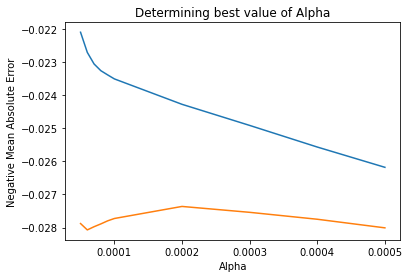

In [118]:
# Plotting graph between mean train score and mean test score
plt.figure()
plt.plot(cv_result_lasso["param_alpha"], cv_result_lasso["mean_train_score"])
plt.plot(cv_result_lasso["param_alpha"], cv_result_lasso["mean_test_score"])
plt.ylabel("Negative Mean Absolute Error")
plt.xlabel("Alpha")
plt.title("Determining best value of Alpha")
plt.show()

##### Best Parameter are

In [119]:
# For ridge
print("Best Parameter for Ridge Regression is {}".format(model_ridge_2.best_estimator_))
# For lasso
print("Best Parameter for Lasso Regression is {}".format(model_lasso_2.best_estimator_))

Best Parameter for Ridge Regression is Ridge(alpha=5)
Best Parameter for Lasso Regression is Lasso(alpha=0.0002)


##### Best Score are

In [120]:
# For ridge
print("Best Score(Absolute mean error) for Ridge Regression is {}".format(model_ridge_2.best_score_))
# For lasso
print("Best Score(Absolute mean error) for Lasso Regression is {}".format(model_lasso_2.best_score_))

Best Score(Absolute mean error) for Ridge Regression is -0.02865757404262765
Best Score(Absolute mean error) for Lasso Regression is -0.027360927045070687


##### Checking coefficient

In [121]:
# For Ridge
ridge_lr = Ridge(alpha=5)
# Fitting into model
ridge_lr.fit(X_train, y_train)

Ridge(alpha=5)

In [122]:
# For Lasso
lasso_lr = Lasso(alpha=0.0002)
# Fitting into model
lasso_lr.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [123]:
# Creating DataFraem
coeff = pd.DataFrame(index=X_train.columns)

coeff["Ridge"] = ridge_lr.coef_
coeff["Abs_value_Ridge"] = abs(ridge_lr.coef_)
coeff["Lasso"] = lasso_lr.coef_
coeff["Abs_value_Lasso"] = abs(lasso_lr.coef_)

coeff

,Ridge,Abs_value_Ridge,Lasso,Abs_value_Lasso
LotFrontage,0.002219,0.002219,-0.000000e+00,0.000000e+00
LotArea,0.020036,0.020036,0.000000e+00,0.000000e+00
OverallQual,0.098429,0.098429,1.410602e-01,1.410602e-01
OverallCond,0.031273,0.031273,3.065109e-02,3.065109e-02
MasVnrArea,0.053704,0.053704,5.407072e-02,5.407072e-02
ExterQual,0.033465,0.033465,2.791266e-02,2.791266e-02
ExterCond,-0.006245,0.006245,-0.000000e+00,0.000000e+00
BsmtQual,0.041410,0.041410,3.732513e-02,3.732513e-02
BsmtCond,-0.003425,0.003425,0.000000e+00,0.000000e+00
BsmtExposure,0.031379,0.031379,3.115612e-02,3.115612e-02


##### Model Selection over Lasso and Ridge
1. Lasso is having best score as compare to the Ridge.
2. It having an advantage of Feature Selection by turning Coefficient to Zero.

#### Checking Assumption

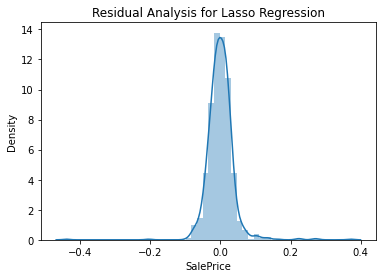

In [124]:
# Checking Assumption
# Residual Analysis
y_train_pred_lasso = lasso_lr.predict(X_train)
res_lasso = y_train - y_train_pred_lasso

plt.figure()
sns.distplot(res_lasso, kde=True)
plt.title("Residual Analysis for Lasso Regression")
plt.show()

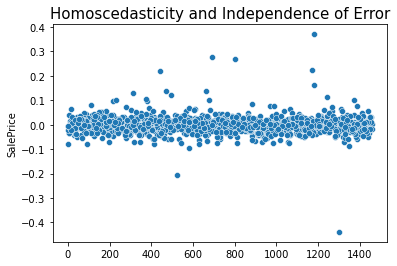

In [125]:
# Homoscedasticit and Independence of Error
# For Lasso
sns.scatterplot(y=res_lasso, x= X_train.index)
plt.title("Homoscedasticity and Independence of Error", fontsize=15)
plt.show()

### Evaluating

In [126]:
# importing library
from sklearn.metrics import r2_score

In [127]:
# Predicting y_test
y_pred_test_lasso = lasso_lr.predict(X_test)

In [128]:
# Calculating R2 score
train_score = r2_score(y_train, y_train_pred_lasso)
print("R2 Score of Training Dataset is {}".format(train_score))
test_score = r2_score(y_test, y_pred_test_lasso)
print("R2 Score of Testing Dataset is {}".format(test_score))

R2 Score of Training Dataset is 0.8743774647686852
R2 Score of Testing Dataset is 0.8506080215473164


#### Questions answers

##### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

##### Answer

In [129]:
# Optimal alpha value for ridge and lasso is
print("Optimal alpha value for Ridge is : {}".format(model_ridge_2.best_estimator_))
print("Optimal alpha value for Lasso is : {}".format(model_lasso_2.best_estimator_))

Optimal alpha value for Ridge is : Ridge(alpha=5)
Optimal alpha value for Lasso is : Lasso(alpha=0.0002)


In [130]:
# When alpha value double
# For ridge alpha = 10
ridge_lr_dalpha = Ridge(alpha=10)
# Fitting in model
ridge_lr_dalpha.fit(X_train, y_train)

Ridge(alpha=10)

In [131]:
# When alpha value double
# For lasso alpha = 0.0004
lasso_lr_dalpha = Lasso(alpha=0.0004)
# Fitting in model
lasso_lr_dalpha.fit(X_train, y_train)

Lasso(alpha=0.0004)

##### R2 Score

In [132]:
# Predicting value
# For Ridge
y_train_pred_r_dalpha = ridge_lr_dalpha.predict(X_train)
y_test_pred_r_dalpha = ridge_lr_dalpha.predict(X_test)

# For Lasso
y_train_pred_l_dalpha = lasso_lr_dalpha.predict(X_train)
y_test_pred_l_dalpha = lasso_lr_dalpha.predict(X_test)

In [133]:
# Creating score dataframe
score_df = pd.DataFrame(index=["Train", "Test"], columns=["Ridge_1_alpha", "Lasso_1_alpha", "Ridge_2_alpha", "Lasso_2_alpha"])

score_df.loc["Train","Ridge_1_alpha"] = r2_score(y_train, ridge_lr.predict(X_train))
score_df.loc["Train","Lasso_1_alpha"] = r2_score(y_train, lasso_lr.predict(X_train))
score_df.loc["Test","Ridge_1_alpha"] = r2_score(y_test, ridge_lr.predict(X_test))
score_df.loc["Test","Lasso_1_alpha"] = r2_score(y_test, lasso_lr.predict(X_test))

score_df.loc["Train","Ridge_2_alpha"] = r2_score(y_train, ridge_lr_dalpha.predict(X_train))
score_df.loc["Train","Lasso_2_alpha"] = r2_score(y_train, lasso_lr_dalpha.predict(X_train))
score_df.loc["Test","Ridge_2_alpha"] = r2_score(y_test, ridge_lr_dalpha.predict(X_test))
score_df.loc["Test","Lasso_2_alpha"] = r2_score(y_test, lasso_lr_dalpha.predict(X_test))

score_df

,Ridge_1_alpha,Lasso_1_alpha,Ridge_2_alpha,Lasso_2_alpha
Train,0.870597,0.874377,0.856641,0.8491
Test,0.853275,0.850608,0.847548,0.845486


##### Conclusion:
- R2 Score decreases when value of alpha is double

##### Checking coefficient

In [134]:
# Creating DataFraem
coeff_2_alpha = pd.DataFrame(index=X_train.columns)

coeff_2_alpha["Ridge_1_alpha"] = ridge_lr.coef_
coeff_2_alpha["Abs_value_Ridge_1_alpha"] = abs(ridge_lr.coef_)
coeff_2_alpha["Lasso_1_alpha"] = lasso_lr.coef_
coeff_2_alpha["Abs_value_Lasso_1_alpha"] = abs(lasso_lr.coef_)

coeff_2_alpha["Ridge_2_alpha"] = ridge_lr_dalpha.coef_
coeff_2_alpha["Abs_value_Ridge_2_alpha"] = abs(ridge_lr_dalpha.coef_)
coeff_2_alpha["Lasso_2_alpha"] = lasso_lr_dalpha.coef_
coeff_2_alpha["Abs_value_Lasso_2_alpha"] = abs(lasso_lr_dalpha.coef_)

coeff_2_alpha

,Ridge_1_alpha,Abs_value_Ridge_1_alpha,Lasso_1_alpha,Abs_value_Lasso_1_alpha,Ridge_2_alpha,Abs_value_Ridge_2_alpha,Lasso_2_alpha,Abs_value_Lasso_2_alpha
LotFrontage,0.002219,0.002219,-0.000000e+00,0.000000e+00,0.006604,0.006604,0.000000e+00,0.000000e+00
LotArea,0.020036,0.020036,0.000000e+00,0.000000e+00,0.014702,0.014702,0.000000e+00,0.000000e+00
OverallQual,0.098429,0.098429,1.410602e-01,1.410602e-01,0.079392,0.079392,1.483816e-01,1.483816e-01
OverallCond,0.031273,0.031273,3.065109e-02,3.065109e-02,0.025168,0.025168,1.872646e-02,1.872646e-02
MasVnrArea,0.053704,0.053704,5.407072e-02,5.407072e-02,0.043218,0.043218,2.980446e-02,2.980446e-02
ExterQual,0.033465,0.033465,2.791266e-02,2.791266e-02,0.034610,0.034610,2.749609e-02,2.749609e-02
ExterCond,-0.006245,0.006245,-0.000000e+00,0.000000e+00,-0.002430,0.002430,0.000000e+00,0.000000e+00
BsmtQual,0.041410,0.041410,3.732513e-02,3.732513e-02,0.039400,0.039400,3.629563e-02,3.629563e-02
BsmtCond,-0.003425,0.003425,0.000000e+00,0.000000e+00,-0.001656,0.001656,0.000000e+00,0.000000e+00
BsmtExposure,0.031379,0.031379,3.115612e-02,3.115612e-02,0.031794,0.031794,2.969258e-02,2.969258e-02


##### Conclusion:
- Coefficient also decreases as value of alpha is double

In [135]:
# Most important predictors are:
coeff_2_alpha[coeff_2_alpha["Abs_value_Lasso_2_alpha"] != 0]["Abs_value_Lasso_2_alpha"]

OverallQual              1.483816e-01
OverallCond              1.872646e-02
MasVnrArea               2.980446e-02
ExterQual                2.749609e-02
BsmtQual                 3.629563e-02
BsmtExposure             2.969258e-02
BsmtFinType1             1.929360e-02
HeatingQC                4.754720e-03
CentralAir               2.465895e-03
2ndFlrSF                 4.289532e-02
GrLivArea                2.936488e-01
BsmtFullBath             1.634919e-02
HalfBath                 3.296816e-03
KitchenQual              3.991467e-02
Fireplaces               4.570935e-03
FireplaceQu              1.577502e-02
GarageFinish             1.099588e-02
GarageCars               5.169820e-02
WoodDeckSF               2.818942e-03
Renewed_Age              5.861128e-03
MSSubClass_50            5.389095e-03
MSSubClass_120           1.945579e-02
MSSubClass_160           8.110386e-03
MSZoning_RL              7.296164e-03
MSZoning_RM              3.293559e-03
LotShape_Reg             3.806020e-04
LandContour_

### Conclusion
There are 36 columns:
1.	OverallQual - Rates the overall material and finish of the house.
2.	OverallCond - Rates the overall condition of the house.
3.	MasVnrArea - Masonry veneer area in square feet.
4.	ExterQual - Evaluates the quality of the material on the exterior. 
5.	BsmtQual - Evaluates the height of the basement.
6.	BsmtExposure - Refers to walkout or garden level walls.
7.	BsmtFinType1 - Rating of basement finished area.
8.	HeatingQC - Heating quality and condition.
9.	CentralAir - Central air conditioning.
10.	2ndFlrSF - Second floor square feet.
11.	GrLivArea - Above grade (ground) living area square feet.
12.	BsmtFullBath - Basement full bathrooms
13.	HalfBath - Half baths above grade
14.	KitchenQual - Kitchen quality
15.	Fireplaces - Number of fireplaces
16.	FireplaceQu - Fireplace quality
17.	GarageFinish - Interior finish of the garage
18.	GarageCars – Size of garage in car capacity
19.	WoodDeckSF - Wood deck area in square feet
20.	Renewed_Age – YrSold – YearRemodAdd
21.	MSSubClass - Identifies the type of dwelling involved in the sale.
22.	MSZoning - Identifies the general zoning classification of the sale.
23.	LotShape - General shape of property
24.	LandContour - Flatness of the property
25.	LotConfig - Lot configuration
26.	Neighborhood - Physical locations within Ames city limits
27.	Condition1 - Proximity to various conditions
28.	BldgType - Type of dwelling
29.	HouseStyle - Style of dwelling
30.	RoofStyle - Type of roof
31.	RoofMatl - Roof material
32.	Exterior1st - Exterior covering on house
33.	Exterior2nd - Exterior covering on house (if more than one material)
34.	GarageType - Garage location
35.	SaleType - Type of sale
36.	SaleCondition - Condition of sale


##### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

##### Answer
1. Lasso is having best score as compare to the Ridge.
2. It having an advantage of Feature Selection by turning Coefficient to Zero.

##### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [136]:
# Top 5 most important predictor in lasso are
coeff = coeff.sort_values(by="Abs_value_Lasso", ascending = False)
coeff["Abs_value_Lasso"][:5]

GrLivArea           0.335982
Condition2_PosN     0.198279
OverallQual         0.141060
RoofMatl_WdShngl    0.110188
MasVnrArea          0.054071
Name: Abs_value_Lasso, dtype: float64